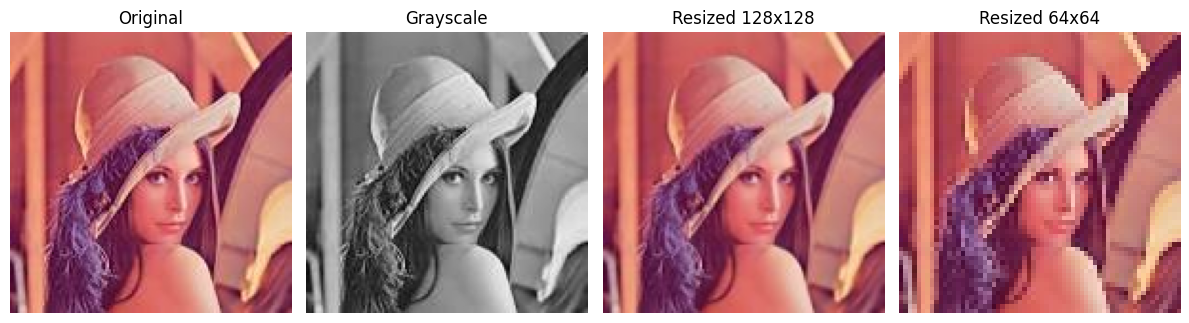

In [1]:
# Problem 1
#  Loadacolor image.
#  •Convert it intograyscale.
#  •Resizeit intodifferentdimensions(eg.128*128 and 64*64).
#  •Displayit intosubplots

import cv2
import matplotlib.pyplot as plt
 
img = cv2.imread("../test_imgs/Lenna.jpg")
  # rgb to gray
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # resize image
img_128 = cv2.resize(img, (128,128))
img_128_rgb = cv2.cvtColor(img_128, cv2.COLOR_BGR2RGB)
img_64 = cv2.resize(img, (64,64))
img_64_rgb = cv2.cvtColor(img_64, cv2.COLOR_BGR2RGB)
 
  # plot
fig, axs = plt.subplots(1, 4, figsize = (12,4))
 
axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")
 
axs[1].imshow(gimg, cmap = 'grey')
axs[1].set_title("Grayscale")
axs[1].axis("off")
 
axs[2].imshow(img_128_rgb)
axs[2].set_title("Resized 128x128")
axs[2].axis("off")
 
axs[3].imshow(img_64_rgb)
axs[3].set_title("Resized 64x64")

axs[3].axis("off")
 
plt.tight_layout()
#plt.savefig("subplotted.png", dpi = 300)
plt.show()

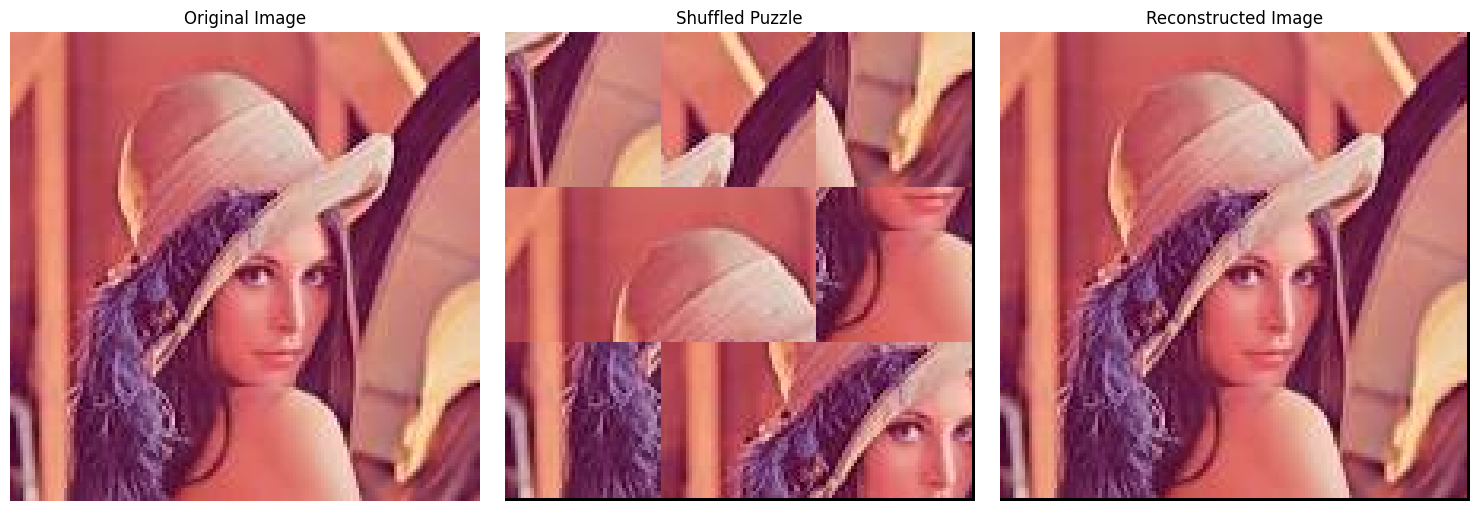

In [3]:
# Problem 2
# Createanimagepuzzle
#  • i.Loadtheimageyouwanttouseandconvert ittoaNumPyarray
#  •Dividetheimageintoblocksofequalsize.Thesizeof theblockswilldependonhowbig
#  youwantyourpuzzlepiecestobe.
#  •Shuffletheorderoftheblockstocreateapuzzle.Youcandothisbyrandomlypermuting
#  theindicesoftheblocks.
#  •Displaytheshuffledblocksasapuzzlebystitchingthembacktogether intheirshuffled
#  order
#  • Toreconstructtheoriginalimage,unshuffletheblocksbyapplyingtheinversepermutation
#  totheshuffledblocksandstitchingthembacktogether intheiroriginalorder.
#  •Storethepermutedandreconstructedimage.

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("../test_imgs/lenna.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define block size and get image dimensions
block_size = (image.shape[0] // 3, image.shape[1] // 3)
height, width, channels = image.shape

# Divide image into 3x3 blocks
blocks = []
indices = []
for i in range(3):
    for j in range(3):
        block = image[i*block_size[0]:(i+1)*block_size[0],
                      j*block_size[1]:(j+1)*block_size[1]]
        blocks.append(block)
        indices.append((i, j))

# Shuffle the blocks
shuffled_indices = list(range(len(blocks)))
random.shuffle(shuffled_indices)

# Stitch a new image from the shuffled blocks
shuffled_image = np.zeros_like(image)
for idx, shuffled_idx in enumerate(shuffled_indices):
    block = blocks[shuffled_idx]
    i, j = indices[idx]
    shuffled_image[i*block_size[0]:(i+1)*block_size[0],
                   j*block_size[1]:(j+1)*block_size[1]] = block

# Store shuffled blocks
shuffled_blocks = [blocks[shuffled_idx] for shuffled_idx in shuffled_indices]

# Reconstruct the image using inverse mapping
reconstructed_image = np.zeros_like(image)
for shuffled_pos, original_pos in enumerate(shuffled_indices):
    block = shuffled_blocks[shuffled_pos]
    i, j = indices[original_pos]
    reconstructed_image[i*block_size[0]:(i+1)*block_size[0],
                        j*block_size[1]:(j+1)*block_size[1]] = block

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(shuffled_image)
axs[1].set_title("Shuffled Puzzle")
axs[1].axis('off')

axs[2].imshow(reconstructed_image)
axs[2].set_title("Reconstructed Image")
axs[2].axis('off')

plt.tight_layout()
#plt.savefig("puzzles_subplotted.png", dpi=300)
plt.show()